Epoch [1000/10000], Loss: 2.1550
Epoch [2000/10000], Loss: 0.4054
Epoch [3000/10000], Loss: 0.1141
Epoch [4000/10000], Loss: 0.0320
Epoch [5000/10000], Loss: 0.0101
Epoch [6000/10000], Loss: 0.0038
Epoch [7000/10000], Loss: 0.0015
Epoch [8000/10000], Loss: 0.0007
Epoch [9000/10000], Loss: 0.0004
Epoch [10000/10000], Loss: 0.0002


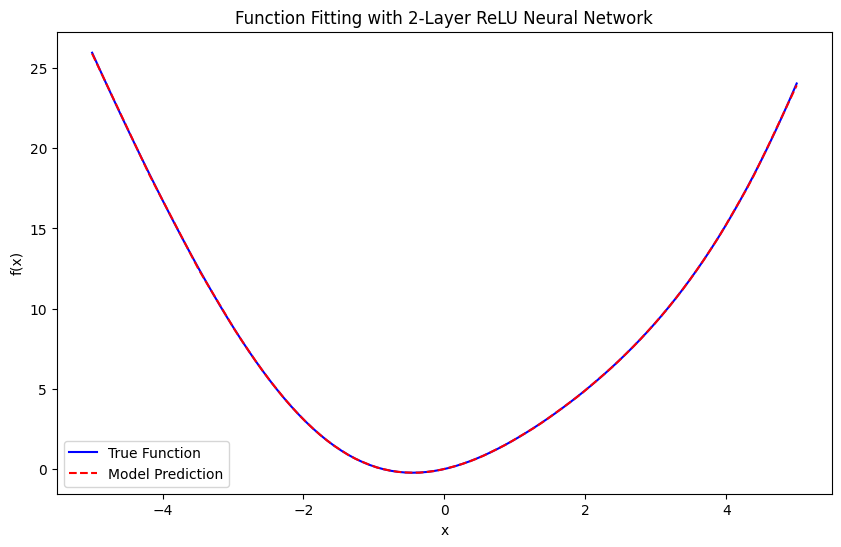

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

#定义目标函数
def target_function(x):
    return np.sin(x) + x*x

# 生成数据集
np.random.seed(0)
x_train = np.random.uniform(-5, 5, 1000) 
y_train = target_function(x_train) 

x_test = np.linspace(-5, 5, 100)  
y_test = target_function(x_test)  


x_train_tensor = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


class ReLU_Network(nn.Module):
    def __init__(self):
        super(ReLU_Network, self).__init__()

        self.fc1 = nn.Linear(1, 64) 
        self.relu = nn.ReLU()

        self.fc2 = nn.Linear(64, 1) 

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = ReLU_Network()
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

#由于数据集的大小，选择10000epoch
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()


    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)


    optimizer.zero_grad() 
    loss.backward()  
    optimizer.step()  

    if (epoch+1) % 1000 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

model.eval()  
with torch.no_grad():
    predicted = model(x_test_tensor).numpy()

plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label="True Function", color='blue')
plt.plot(x_test, predicted, label="Model Prediction", color='red', linestyle='--')
plt.legend()
plt.title("Function Fitting with 2-Layer ReLU Neural Network")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()
